In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("datanew.csv")

Phase 1

           Tarih  Kapanış
0   5 Kasım 2019   274.62
1   6 Kasım 2019   275.67
2   7 Kasım 2019   271.28
3   8 Kasım 2019   270.33
4  11 Kasım 2019   270.13


/tmp/ipykernel_13478/2008345359.py:50: RuntimeWarning: overflow encountered in square
  self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
/home/furkanblt/anaconda3/envs/ML_Datathon/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_13478/2008345359.py:57: RuntimeWarning: invalid value encountered in matmul
  h = np.matmul(self.X, self.theta)
/tmp/ipykernel_13478/2008345359.py:49: RuntimeWarning: invalid value encountered in matmul
  h = np.matmul(self.X, self.theta)  # Hypothesis


TypeError: LinearRegression.predict() missing 1 required positional argument: 'Y_test'

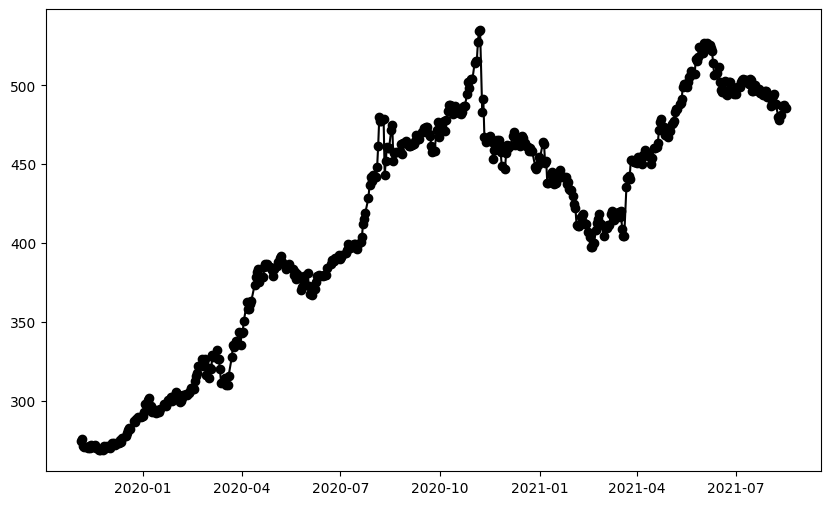

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv("datanew.csv")

# Check the first few rows of the data to understand its structure
print(data.head())

# Assuming 'Tarih' is the date column and 'Kapanış' is the price column

# Create a dictionary to translate Turkish month names to English
month_translation = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April', 'Mayıs': 'May', 'Haziran': 'June',
    'Temmuz': 'July', 'Ağustos': 'August', 'Eylül': 'September', 'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}

# Function to replace Turkish month names with English ones
def translate_month_names(date_str):
    for tr_month, en_month in month_translation.items():
        if tr_month in date_str:
            date_str = date_str.replace(tr_month, en_month)
    return date_str

# Apply the translation to the 'Tarih' column
data["Tarih"] = data["Tarih"].apply(translate_month_names)

# Convert 'Tarih' to datetime format using the translated months and 'dayfirst=True'
data["Tarih"] = pd.to_datetime(data["Tarih"], format="%d %B %Y")

# Convert 'Kapanış' to numpy array for regression
X = np.array(range(len(data))).reshape(-1, 1)  # We use the day index as X (independent variable)
Y = data["Kapanış"].values  # The 'Kapanış' values as Y (dependent variable)

# Linear Regression Class
class LinearRegression:
    def __init__(self, X, Y): 
        # Add a column of ones to X to account for the intercept term (bias)
        ones = np.ones((X.shape[0], 1))
        X = np.hstack([ones, X])
        self.X = X
        self.Y = Y
        self.m = X.shape[0]  # Number of training examples
        self.n = X.shape[1]  # Number of features (including the intercept)
        self.theta = np.random.randn(self.n)  # Random initialization of theta

    def computeCostFunction(self):
        h = np.matmul(self.X, self.theta)  # Hypothesis
        self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
        return self.J

    def performGradientDescent(self, num_of_iter, alpha):
        self.Cost_history = []
        self.theta_history = []
        for _ in range(num_of_iter):
            h = np.matmul(self.X, self.theta)
            J = self.computeCostFunction()  # Calculate the cost
            self.Cost_history.append(J)
            self.theta_history.append(self.theta.copy())  # Store the current theta value
            error = h - self.Y
            self.theta -= (alpha / self.m) * np.dot(self.X.T, error)  # Update theta
        return self.theta, self.Cost_history, self.theta_history

    def predict(self, X_test, Y_test):
        # Add a column of ones to X_test to account for the intercept term
        ones = np.ones((X_test.shape[0], 1))
        X_test = np.hstack([ones, X_test])
        self.Y_pred = np.matmul(X_test, self.theta)  # Make predictions
        self.error_percentage = (abs(self.Y_pred - Y_test) / Y_test) * 100  # Calculate error percentage
        return self.Y_pred, self.error_percentage

    def predictUsingNormalEquation(self, X_test, Y_test):
        # Add a column of ones to X_test to account for the intercept term
        ones = np.ones((X_test.shape[0], 1))
        X_test = np.hstack([ones, X_test])
        # Normal equation to calculate optimal theta
        inv = np.linalg.inv(np.matmul(self.X.T, self.X))
        self.w = np.matmul(np.matmul(inv, self.X.T), self.Y)
        y_pred = np.matmul(X_test, self.w)
        error_percentage = (abs(Y_test - y_pred) / Y_test) * 100  # Calculate error percentage
        return y_pred, error_percentage

    def returnTheta(self):
        return self.theta
    
    def returnX(self):
        return self.X
    
    def returnY(self):
        return self.Y

# Create Linear Regression model
model = LinearRegression(X, Y)

# Perform gradient descent for 1000 iterations with learning rate alpha = 0.01
theta, cost_history, theta_history = model.performGradientDescent(num_of_iter=1000, alpha=0.01)

# Plotting the original data and the regression line
plt.figure(figsize=(10, 6))
plt.plot(data["Tarih"], data["Kapanış"], label="Actual Data", color='black', marker='o')

# Predict values using the model
Y_pred = model.predict(X)

# Plotting the regression line
plt.plot(data["Tarih"], Y_pred, label="Regression Line", color='red', linestyle='-', linewidth=2)

# Labeling the chart
plt.title('Gold Price Regression Line (Linear Regression)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gold Price (Kapanış)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Phase 2

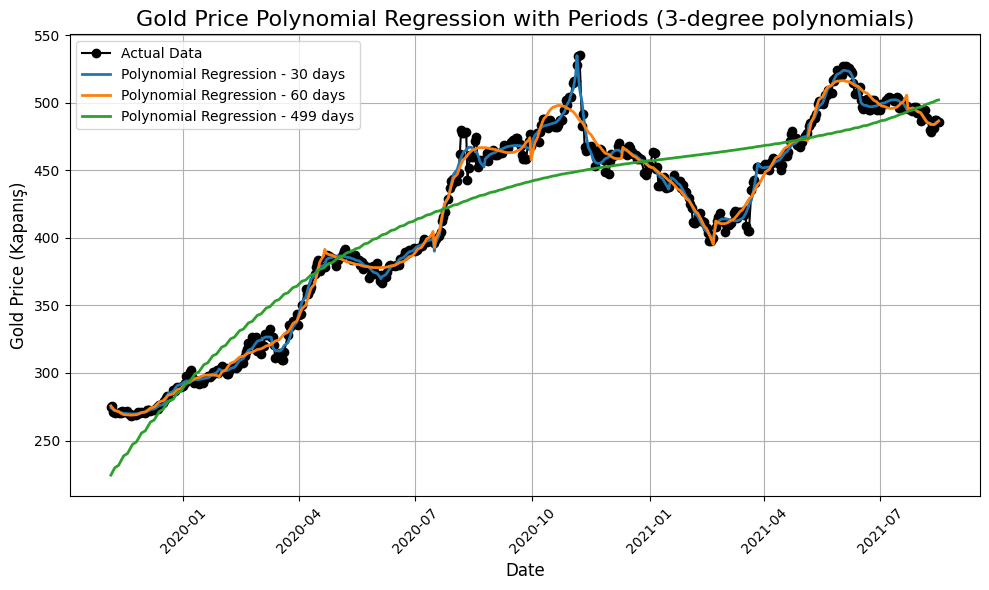

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv("datanew.csv")

# Create a dictionary to translate Turkish month names to English
month_translation = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April', 'Mayıs': 'May', 'Haziran': 'June',
    'Temmuz': 'July', 'Ağustos': 'August', 'Eylül': 'September', 'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}

# Function to replace Turkish month names with English ones
def translate_month_names(date_str):
    for tr_month, en_month in month_translation.items():
        if tr_month in date_str:
            date_str = date_str.replace(tr_month, en_month)
    return date_str

# Apply the translation to the 'Tarih' column
data["Tarih"] = data["Tarih"].apply(translate_month_names)

# Convert 'Tarih' to datetime format using the translated months and 'dayfirst=True'
data["Tarih"] = pd.to_datetime(data["Tarih"], format="%d %B %Y")

# Convert 'Kapanış' to numpy array for regression
X = np.array(range(len(data))).reshape(-1, 1)  # We use the day index as X (independent variable)
Y = data["Kapanış"].values  # The 'Kapanış' values as Y (dependent variable)

# Polynomial Regression Class
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree

    def fit(self, X, Y):
        # Fit a polynomial regression of the specified degree
        self.coefficients = np.polyfit(X.flatten(), Y, self.degree)
        self.poly = np.poly1d(self.coefficients)
        
    def predict(self, X):
        # Predict using the polynomial regression
        return self.poly(X.flatten())

# Function to apply polynomial regression on different periods
def apply_polynomial_regression(X, Y, period, degree):
    predictions = []
    
    # Split the data into chunks based on the period
    for i in range(0, len(X), period):
        # Define the current chunk
        X_chunk = X[i:i+period]
        Y_chunk = Y[i:i+period]
        
        # Fit a polynomial regression for this chunk
        model = PolynomialRegression(degree)
        model.fit(X_chunk, Y_chunk)
        
        # Predict using the model for this chunk
        Y_pred_chunk = model.predict(X_chunk)
        predictions.extend(Y_pred_chunk)
        
    return np.array(predictions)

# Plotting the results
def plot_regression_lines(X, Y, periods, degree):
    plt.figure(figsize=(10, 6))
    
    # Plot the actual data
    plt.plot(data["Tarih"], Y, label="Actual Data", color='black', marker='o')
    
    # Plot the polynomial regression lines for different periods
    for period in periods:
        Y_pred = apply_polynomial_regression(X, Y, period, degree)
        plt.plot(data["Tarih"][:len(Y_pred)], Y_pred, label=f"Polynomial Regression - {period} days", linewidth=2)
    
    # Labeling the chart
    plt.title(f'Gold Price Polynomial Regression with Periods ({degree}-degree polynomials)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Gold Price (Kapanış)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define periods and polynomial degree
periods = [30, 60, len(X)]  # Example periods: 30 days, 60 days, and entire dataset
degree = 3  # Polynomial degree (can be adjusted to 2, 3, 4, etc.)

# Plot polynomial regression lines
plot_regression_lines(X, Y, periods, degree)


Phase 3

Predictions using Normal Equation:  [308.39090741 308.82747651 309.26404561 309.70061471 310.13718381
 310.57375291 311.01032201 311.44689111 311.88346021 312.32002931
 312.75659841 313.19316751 313.62973661 314.06630571 314.50287481
 314.93944391 315.37601301 315.81258211 316.24915121 316.68572031
 317.12228941 317.55885851 317.99542761 318.43199671 318.86856581
 319.30513491 319.74170401 320.17827311 320.6148422  321.0514113
 321.4879804  321.9245495  322.3611186  322.7976877  323.2342568
 323.6708259  324.107395   324.5439641  324.9805332  325.4171023
 325.8536714  326.2902405  326.7268096  327.1633787  327.5999478
 328.0365169  328.473086   328.9096551  329.3462242  329.7827933
 330.2193624  330.6559315  331.0925006  331.5290697  331.9656388
 332.4022079  332.83877699 333.27534609 333.71191519 334.14848429
 334.58505339 335.02162249 335.45819159 335.89476069 336.33132979
 336.76789889 337.20446799 337.64103709 338.07760619 338.51417529
 338.95074439 339.38731349 339.82388259 340.26

/tmp/ipykernel_13478/734896721.py:19: RuntimeWarning: overflow encountered in square
  self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
/home/furkanblt/anaconda3/envs/ML_Datathon/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_13478/734896721.py:26: RuntimeWarning: invalid value encountered in matmul
  h = np.matmul(self.X, self.theta)
/tmp/ipykernel_13478/734896721.py:18: RuntimeWarning: invalid value encountered in matmul
  h = np.matmul(self.X, self.theta)  # Hypothesis


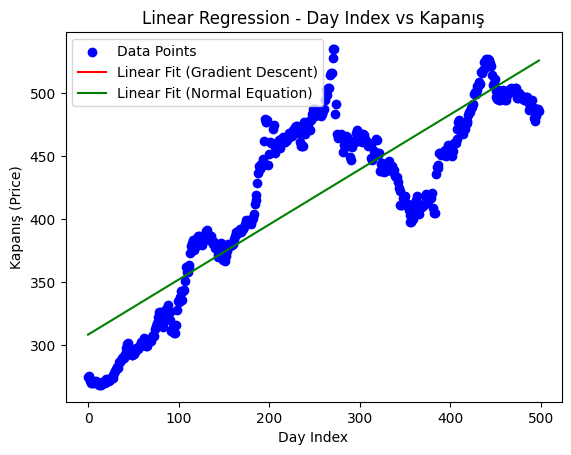

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


class LinearRegression:
    def __init__(self, X, Y):
        # Add a column of ones to X to account for the intercept term (bias)
        ones = np.ones((X.shape[0], 1))
        X = np.hstack([ones, X])
        self.X = X
        self.Y = Y
        self.m = X.shape[0]  # Number of training examples
        self.n = X.shape[1]  # Number of features (including the intercept)
        self.theta = np.random.randn(self.n)  # Random initialization of theta

    def computeCostFunction(self):
        h = np.matmul(self.X, self.theta)  # Hypothesis
        self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
        return self.J

    def performGradientDescent(self, num_of_iter, alpha):
        self.Cost_history = []
        self.theta_history = []
        for _ in range(num_of_iter):
            h = np.matmul(self.X, self.theta)
            J = self.computeCostFunction()  # Calculate the cost
            self.Cost_history.append(J)
            self.theta_history.append(self.theta.copy())  # Store the current theta value
            error = h - self.Y
            self.theta -= (alpha / self.m) * np.dot(self.X.T, error)  # Update theta
        return self.theta, self.Cost_history, self.theta_history

    def predict(self, X_test, Y_test):
        # Add a column of ones to X_test to account for the intercept term
        ones = np.ones((X_test.shape[0], 1))
        X_test = np.hstack([ones, X_test])
        self.Y_pred = np.matmul(X_test, self.theta)  # Make predictions
        self.error_percentage = (abs(self.Y_pred - Y_test) / Y_test) * 100  # Calculate error percentage
        return self.Y_pred, self.error_percentage

    def predictUsingNormalEquation(self, X_test, Y_test):
        # Add a column of ones to X_test to account for the intercept term
        ones = np.ones((X_test.shape[0], 1))
        X_test = np.hstack([ones, X_test])
        # Normal equation to calculate optimal theta
        inv = np.linalg.inv(np.matmul(self.X.T, self.X))
        self.w = np.matmul(np.matmul(inv, self.X.T), self.Y)
        y_pred = np.matmul(X_test, self.w)
        error_percentage = (abs(Y_test - y_pred) / Y_test) * 100  # Calculate error percentage
        return y_pred, error_percentage

    def returnTheta(self):
        return self.theta

    def returnX(self):
        return self.X

    def returnY(self):
        return self.Y


# Example Usage

# Sample Data - Replace with actual data
data = pd.read_csv("datanew.csv")

# Assuming 'Kapanış' column is the target and 'Tarih' is the feature
# Preprocessing the data
X = np.array(range(len(data))).reshape(-1, 1)  # Day index (as an example feature)
Y = data["Kapanış"].values  # Target variable

# Initialize Linear Regression model
model = LinearRegression(X, Y)

# Perform gradient descent
theta, cost_history, theta_history = model.performGradientDescent(num_of_iter=1000, alpha=0.01)


# Make predictions using Normal Equation
y_pred_ne, error_percentage_ne = model.predictUsingNormalEquation(X, Y)

# Print predictions and error percentages for Normal Equation
print("Predictions using Normal Equation: ", y_pred_ne)
print("Error Percentage using Normal Equation: ", error_percentage_ne)

# Plotting the data and regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Linear Fit (Gradient Descent)')
plt.plot(X, y_pred_ne, color='green', label='Linear Fit (Normal Equation)')
plt.xlabel("Day Index")
plt.ylabel("Kapanış (Price)")
plt.title("Linear Regression - Day Index vs Kapanış")
plt.legend()
plt.show()